In [1]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
import trimesh as tm 
import tkinter as tk
from tkinter import filedialog 
import pandas as pd
import os
import seaborn as sns

In [2]:
def select_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    mesh_file = filedialog.askopenfile()
    return mesh_file
def select_files():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    mesh_file = filedialog.askopenfiles()
    return mesh_file

In [3]:
filtered_files = select_file()

In [7]:
sim_files = pd.read_csv(filtered_files.name)

In [8]:
file_list = sim_files['sim_csv']

In [9]:
ver_stress_l = np.empty(0)
hor_stress_l = np.empty(0)
dia_stress_l = np.empty(0)
tor_stress_l = np.empty(0)
ver_disp_l = np.empty(0)
hor_disp_l = np.empty(0)
dia_disp_l = np.empty(0)
tor_disp_l = np.empty(0)

for data_f in file_list:
    sim_data = pd.read_csv(data_f)
    ver_stress_l = np.append(ver_stress_l, np.array(sim_data['ver_stress']))
    hor_stress_l = np.append(hor_stress_l, np.array(sim_data['hor_stress']))
    tor_stress_l = np.append(tor_stress_l, np.array(sim_data['tor_stress']))
    dia_stress_l = np.append(dia_stress_l, np.array(sim_data['dia_stress']))
    ver_disp_l = np.append(ver_disp_l, np.array(sim_data['ver_magdisp']))
    hor_disp_l = np.append(hor_disp_l, np.array(sim_data['hor_magdisp']))
    dia_disp_l = np.append(dia_disp_l, np.array(sim_data['dia_magdisp']))
    tor_disp_l = np.append(tor_disp_l, np.array(sim_data['tor_magdisp']))

In [ ]:
plt.title('Maximum stress')
plt.scatter(id, ver_stress_max, label= 'Load case 1')
plt.scatter(id, hor_stress_max,label= 'Load case 2')
plt.scatter(id,dia_stress_max, label= 'Load case 3')
plt.scatter(id, tor_stress_max,label= 'Load case 4')
plt.ylabel('Stress (GPa)')
plt.xlabel('Part Id')
plt.legend()
plt.show()

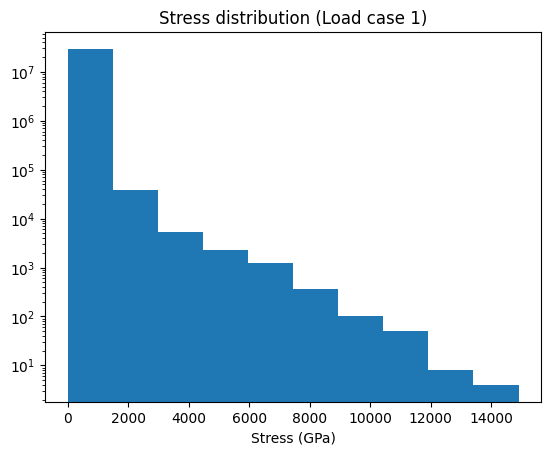

In [11]:
plt.hist(ver_stress_l, log=True) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

In [13]:
volume_list = []
for part_mesh in sim_files['sur_mesh']:
    part_i = pv.read(part_mesh)
    part_volume = part_i.volume
    volume_list.append(part_volume)


In [15]:
ver_stress_max = []
hor_stress_max = []
dia_stress_max = []
tor_stress_max = []
ver_disp_max = []
hor_disp_max = []
dia_disp_max = []
tor_disp_max = []

for data_f in file_list:
    sim_data = pd.read_csv(data_f)
    ver_stress_max.append(sim_data['ver_stress'].max())
    hor_stress_max.append(sim_data['hor_stress'].max())
    dia_stress_max.append(sim_data['dia_stress'].max())
    tor_stress_max.append(sim_data['tor_stress'].max())
    ver_disp_max.append(sim_data['ver_magdisp'].max())
    hor_disp_max.append(sim_data['hor_magdisp'].max())
    dia_disp_max.append(sim_data['dia_magdisp'].max())
    tor_disp_max.append(sim_data['tor_magdisp'].max())

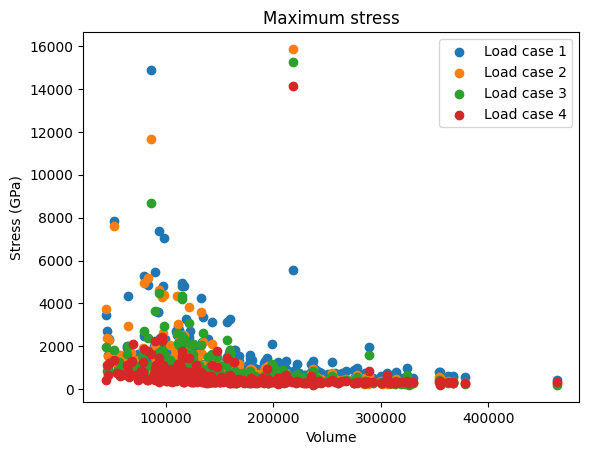

In [16]:
plt.title('Maximum stress')
plt.scatter(volume_list, ver_stress_max, label= 'Load case 1')
plt.scatter(volume_list, hor_stress_max,label= 'Load case 2')
plt.scatter(volume_list,dia_stress_max, label= 'Load case 3')
plt.scatter(volume_list, tor_stress_max,label= 'Load case 4')
plt.ylabel('Stress (GPa)')
plt.xlabel('Volume')
plt.legend()
plt.show()

In [17]:

def get_points_from_face_index(mesh: tm.Trimesh, face_index: int):
    return mesh.vertices[mesh.faces[face_index]]
def thickness_3D(mesh):
    points = [np.sum(get_points_from_face_index(mesh, f), axis=0)/3 for f in range(len(mesh.faces))]
    return tm.proximity.thickness(mesh, points)

In [18]:
mesh_sample = tm.load(sim_files['sur_mesh'][5])

In [21]:
thickness = thickness_3D(mesh_sample)

In [26]:
def visualize(mesh, thicknesses):
    

    face_colors = thicknesses

    
    # colormap for thicknesses
    colormap = plt.get_cmap('viridis')
    face_colors = colormap(face_colors / max(thicknesses))

    mesh.visual.face_colors = face_colors
    mesh.show(smooth=False)

In [27]:
visualize(mesh_sample, thickness)